In [35]:
# import packages

# import clevercsv as csv
import re
from datetime import datetime
import time
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import pandas_profiling as pdp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import csv
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [36]:
plt.style.use('dark_background')
pio.templates.default = "plotly_dark"

In [37]:
col_names= ['JOBID', 'ACCOUNT', 'USER', 'REQMEM', 'USEDMEM', 'REQTIME', 'USEDTIME',
       'NODES', 'CPUS', 'PARTITION', 'EXITCODE', 'STATE', 'NODE1','NODE2','NODE3','NODE4','NODE5','NODE6']
accre_df = pd.read_csv('accre-jobs-2020.csv', names=col_names) 


C:\Users\matth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
accre_df.shape

(3816291, 18)

In [39]:
accre_df = accre_df[1:]

In [40]:
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODE1,NODE2,NODE3,NODE4,NODE5,NODE6
1,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,NaN,NaN,NaN,NaN,NaN
2,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,NaN,NaN,NaN,NaN,NaN
3,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,NaN,NaN,NaN,NaN,NaN
4,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,NaN,NaN,NaN,NaN,NaN
5,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,NaN,NaN,NaN,NaN,NaN


In [41]:
# change cpu cores to float
accre_df['CPUS']= accre_df['CPUS'].astype(str).astype(float)

In [42]:
# chang nodes to float
accre_df['NODES']= accre_df['NODES'].astype(str).astype(float)

In [43]:
# remove columns
clean_accre_df = accre_df.drop(["JOBID","USER","EXITCODE","PARTITION",
                               "NODE1","NODE2","NODE3","NODE4","NODE5","NODE6"], axis =1) # axis = 1 so that it works across our columns
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED


In [44]:
#new column is for requested memory per node
clean_accre_df['RMPN'] = clean_accre_df['REQMEM'].str.extract('(.*)Mn$')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,122880
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,122880
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,122880
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,122880
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,122880


In [45]:
#new column is for requested memory per core
clean_accre_df['RMPC'] = clean_accre_df['REQMEM'].str.extract('(.*)Mc$')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,122880,NaN
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,122880,NaN
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,122880,NaN
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,122880,NaN
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,122880,NaN


In [14]:
clean_accre_df['RMPC'].fillna('0').head()

1    0
2    0
3    0
4    0
5    0
Name: RMPC, dtype: object

In [46]:
clean_accre_df['RMPN'].fillna('0').head()

1    122880
2    122880
3    122880
4    122880
5    122880
Name: RMPN, dtype: object

In [47]:
# change RMPC colum to fill with na with 0
clean_accre_df['RMPC'] = clean_accre_df['RMPC'].fillna('0')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,122880,0
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,122880,0
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,122880,0
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,122880,0
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,122880,0


In [48]:
# Change RMPN column to fill na with 0
clean_accre_df['RMPN'] = clean_accre_df['RMPN'].fillna('0')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,122880,0
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,122880,0
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,122880,0
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,122880,0
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,122880,0


In [49]:
clean_accre_df['RMPC']= clean_accre_df['RMPC'].astype(str).astype(float)

In [50]:
clean_accre_df['RMPN']= clean_accre_df['RMPN'].astype(str).astype(float)

In [51]:
# clean the USEDMEM column
#new column is for requested memory per core
clean_accre_df['UM'] = clean_accre_df['USEDMEM'].str.extract('(.*)M$')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,122880.0,0.0,65973.49
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,122880.0,0.0,67181.12
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,122880.0,0.0,69111.86
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,122880.0,0.0,65317.33
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,122880.0,0.0,65876.11


In [52]:
# what do I fill the na with? 
clean_accre_df['UM'] = clean_accre_df['UM'].fillna('3227.633')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,122880.0,0.0,65973.49
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,122880.0,0.0,67181.12
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,122880.0,0.0,69111.86
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,122880.0,0.0,65317.33
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,122880.0,0.0,65876.11


In [53]:
clean_accre_df['UM']= clean_accre_df['UM'].astype(str).astype(float)

In [54]:
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,122880.0,0.0,65973.49
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,122880.0,0.0,67181.12
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,122880.0,0.0,69111.86
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,122880.0,0.0,65317.33
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,122880.0,0.0,65876.11


In [55]:
clean_accre_df['UM'].describe()

count    3.816290e+06
mean     3.737245e+03
std      7.853432e+03
min      0.000000e+00
25%      2.951200e+02
50%      1.698150e+03
75%      3.227633e+03
max      3.116446e+05
Name: UM, dtype: float64

In [56]:
test_state = clean_accre_df[(clean_accre_df["STATE"] == 'COMPLETED')]

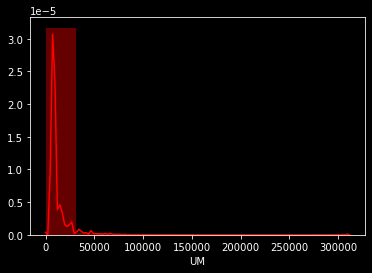

In [57]:
sns.distplot(test_state.UM, bins=10, kde=True, color="red");

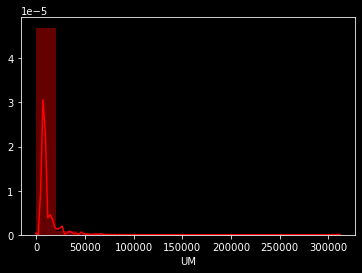

In [58]:
sns.distplot(clean_accre_df.UM, bins=15, kde=True, color="red");

In [59]:
clean_accre_df['NODES'].unique()

array([  1.,   4.,   2.,   3.,   5.,  38.,  30.,  25.,  21.,  13.,  19.,
        23.,  12.,  51.,  37.,  75., 126.,  11.,  10.,  20.,  40.,  41.,
        97.,  45.,   6.,  63.,   8., 143.,  15.,  24.,  35.,  48.,  80.,
        99., 120.,  64., 121.,  39.,  55.,   9.,  66.,  27.,  17.,  28.,
        53.,  34.,  70.,  67.,  59.,  77.,  58.,  43.,  31.,  61.,  52.,
        50.,  16.,  26.,  22.,  14., 112.,   7.,  95., 109., 100., 149.,
       146., 114.,  94.,  87., 140., 142.,  44., 156., 163.,  62., 129.,
        68., 200., 400., 500.,  18.,  93.])

In [63]:
# what is per core??? assume you multiply cpus by node this column will be RMPN times CPUS 
#3.5 is the average node to core ratio
clean_accre_df['RMPN'] = clean_accre_df['RMPN']/3.5
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,35108.571429,0.0,65973.49
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,35108.571429,0.0,67181.12
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,35108.571429,0.0,69111.86
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,35108.571429,0.0,65317.33
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,35108.571429,0.0,65876.11


In [64]:
# what is per core??? update RMPC to add the RMPNEW column
clean_accre_df['RMPC'] = clean_accre_df['RMPC'] + clean_accre_df['RMPN']
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,35108.571429,35108.571429,65973.49
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,35108.571429,35108.571429,67181.12
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,35108.571429,35108.571429,69111.86
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,35108.571429,35108.571429,65317.33
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,35108.571429,35108.571429,65876.11


In [65]:
#convert used memory to cores 
clean_accre_df['UM'] =clean_accre_df['UM']/3.5

In [66]:
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,35108.571429,35108.571429,18849.568571
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,35108.571429,35108.571429,19194.605714
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,35108.571429,35108.571429,19746.245714
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,35108.571429,35108.571429,18662.094286
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,35108.571429,35108.571429,18821.745714


In [68]:
# PERCENT of request to actual used
clean_accre_df['PRU'] = ((clean_accre_df['UM'] - clean_accre_df['RMPC'])/clean_accre_df['RMPC']) * 100
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM,PRU
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,35108.571429,35108.571429,18849.568571,-46.310636
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,35108.571429,35108.571429,19194.605714,-45.327865
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,35108.571429,35108.571429,19746.245714,-43.756624
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,35108.571429,35108.571429,18662.094286,-46.844621
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,35108.571429,35108.571429,18821.745714,-46.389884


In [69]:
clean_accre_df.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
yu             95097.481773
horn            1431.434409
gem              193.566739
celery           124.306345
bibb              87.177993
                   ...     
cms_gpu_acc      -97.912699
stalk            -98.117432
crab             -98.369449
basil            -99.014508
plumcot          -99.783919
Name: PRU, Length: 175, dtype: float64

In [75]:
accre_df_best = clean_accre_df[(clean_accre_df["PRU"] == 0)]
accre_df_percent.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
winged         0.0
galia          0.0
arra           0.0
belle          0.0
bulk           0.0
bunch          0.0
cantared       0.0
carambola      0.0
carrot         0.0
casaba         0.0
cep            0.0
chickpeas      0.0
cms            0.0
cms_lowprio    0.0
fresh          0.0
horseradish    0.0
turban         0.0
jicama         0.0
lemon          0.0
lollo          0.0
mixed          0.0
retailer       0.0
roasted        0.0
seeded         0.0
shallots       0.0
sharlin        0.0
sprite         0.0
sturmer        0.0
summer         0.0
texas          0.0
alkmene        0.0
Name: PRU, dtype: float64

In [77]:
accre_df_toolittle = clean_accre_df[(clean_accre_df["PRU"] > 800)]
accre_df_toolittle.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
horn          322663.300000
yu            313878.264384
gem            32176.330000
conference      5638.014222
cantared        3414.661792
retailer        3127.633000
bulk            3127.633000
texas           1191.053200
celery          1191.053200
cactus           822.180857
Name: PRU, dtype: float64

In [82]:
accre_df_over = clean_accre_df[(clean_accre_df["PRU"] < -99)]
accre_df_over.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
clara      -99.240720
orange     -99.267211
milwa      -99.291327
bertanne   -99.320012
amaranth   -99.322053
              ...    
pinova     -99.986426
cmsadmin   -99.995819
stalk      -99.995850
shiny      -99.999771
delblush   -99.999844
Name: PRU, Length: 145, dtype: float64

# Question 3
What groups are best optimizing their memory usage in terms of percent of actual memory used of the memory requested for a job? What is the average percent for each group?

# Question 4

# Answer 1:
x is the best group for using 

# Answer 2:
The average percent for each group is

In [83]:
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM,PRU
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,35108.571429,35108.571429,18849.568571,-46.310636
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,35108.571429,35108.571429,19194.605714,-45.327865
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,35108.571429,35108.571429,19746.245714,-43.756624
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,35108.571429,35108.571429,18662.094286,-46.844621
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,35108.571429,35108.571429,18821.745714,-46.389884


In [90]:
string = '13-18:00:00'
string.replace('-',':')

'13:18:00:00'

In [94]:
# REPLACE - WITH :
clean_accre_df['REQTIME'] = clean_accre_df['REQTIME'].replace('-',':',regex=True)
clean_accre_df['USEDTIME'] = clean_accre_df['USEDTIME'].replace('-',':',regex=True)

In [95]:
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM,PRU
1,treviso,122880Mn,65973.49M,13:18:00:00,13:18:00:28,1.0,24.0,COMPLETED,35108.571429,35108.571429,18849.568571,-46.310636
2,treviso,122880Mn,67181.12M,13:18:00:00,12:14:50:56,1.0,24.0,COMPLETED,35108.571429,35108.571429,19194.605714,-45.327865
3,treviso,122880Mn,69111.86M,13:18:00:00,13:18:00:20,1.0,24.0,COMPLETED,35108.571429,35108.571429,19746.245714,-43.756624
4,treviso,122880Mn,65317.33M,13:18:00:00,12:03:50:32,1.0,24.0,COMPLETED,35108.571429,35108.571429,18662.094286,-46.844621
5,treviso,122880Mn,65876.11M,13:18:00:00,13:18:00:03,1.0,24.0,COMPLETED,35108.571429,35108.571429,18821.745714,-46.389884


In [104]:
clean_accre_df.tail()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM,PRU
3816286,portabella,32768Mn,30042.68M,1:00:00:00,00:02:27,1.0,2.0,COMPLETED,9362.285714,9362.285714,8583.622857,-8.317017
3816287,portabella,32768Mn,31067.75M,1:00:00:00,00:02:27,1.0,2.0,COMPLETED,9362.285714,9362.285714,8876.500000,-5.188751
3816288,portabella,32768Mn,21207.96M,1:00:00:00,00:01:40,1.0,2.0,COMPLETED,9362.285714,9362.285714,6059.417143,-35.278442
3816289,boysenberries,100000Mn,0,1:00:00:00,00:03:05,1.0,8.0,RUNNING,28571.428571,28571.428571,922.180857,-96.772367
3816290,horseradish,20480Mn,0,05:00:00,00:02:05,1.0,1.0,RUNNING,5851.428571,5851.428571,922.180857,-84.240073


In [108]:
foo = '20:23:32'
foo = foo[:-3]
foo

'20:23'

In [ ]:
# gather days
'[\.-](\d{2})[\.-]'

In [109]:
# gather hours there may be missing because the days will not be there
'[\.-](\d{2})[\.-]'

In [ ]:
# gather minutes
'[\.-](\d{2})[\.-]'